In [148]:
    import pandas as pd
    import numpy as np

pandas의 역할 (https://programmerpsy.tistory.com/5)
1) pandas 는 관계형 또는 레이블이 된 데이터를 직관적으로 작업할 수 있도록 설계
2) 가능 범위
   - List, Tuple, Dict, NumpyArray 자료구조의 호환
   - 큰 데이터의 빠른 Indexing / Slicing / Sorting
   - 두 데이터 간의 join (행, 열 방향) 기능
   - 데이터의 피봇팅 및 그룹핑
   - 데이터의 통계 및 시각화 기능
   - 외부 데이터를 입력받아서 저장 및 출력 

numpy의 역할 (https://doorbw.tistory.com/171)
1) stands for numercial python / 행렬이라는 개념으로 생각

In [5]:
retail = pd.read_csv('/Users/JIWON MOK/Desktop/project/shoppingmall/Data/OnlineRetail.csv')
print(retail.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


데이터 리포트를 만드는 순서 

#1. 데이터 분석의 가장 첫 단계
#2. 데이터를 대략적으로 파악 가능 ( 타입, 저장된 형태 )
#3. 데이터 cleansing 전략 수립

In [149]:
print(retail.head())

   Unnamed: 0  InvoiceNo StockCode                          Description  \
0           0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER   
1           1     536365     71053                  WHITE METAL LANTERN   
2           2     536365    84406B       CREAM CUPID HEARTS COAT HANGER   
3           3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
4           4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.   

   Quantity         InvoiceDate  UnitPrice  CustomerID         Country  \
0         6 2010-12-01 08:26:00       2.55       17850  United Kingdom   
1         6 2010-12-01 08:26:00       3.39       17850  United Kingdom   
2         8 2010-12-01 08:26:00       2.75       17850  United Kingdom   
3         6 2010-12-01 08:26:00       3.39       17850  United Kingdom   
4         6 2010-12-01 08:26:00       3.39       17850  United Kingdom   

   CheckoutPrice      Month MonthStarted  MonthPassed  
0          15.30 2010-12-01   2010-12-01        

In [150]:
print(retail.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     397884 non-null  int64         
 1   InvoiceNo      397884 non-null  int64         
 2   StockCode      397884 non-null  object        
 3   Description    397884 non-null  object        
 4   Quantity       397884 non-null  int32         
 5   InvoiceDate    397884 non-null  datetime64[ns]
 6   UnitPrice      397884 non-null  float32       
 7   CustomerID     397884 non-null  int32         
 8   Country        397884 non-null  object        
 9   CheckoutPrice  397884 non-null  float64       
 10  Month          397884 non-null  datetime64[ns]
 11  MonthStarted   397884 non-null  datetime64[ns]
 12  MonthPassed    397884 non-null  int64         
dtypes: datetime64[ns](3), float32(1), float64(1), int32(2), int64(3), object(3)
memory usage: 34.9+ MB
None


numpy 데이터타입

1) float64 : 실수 1.2, 24.24
2) int64 : 정수 -2,-1,0,1,2
3) object : 객체

i - integer (정수)

b - boolean (참거짓)

u - unsigned integer (부호없는 정수)

f - float (소수)

c - complex (복소수)

m - timedelta (타임델타)

M - datetime (날짜시간)

O - object (객체)

S - string (문자열)

U - unicode string (유니코드 문자열)

V - void (다른 유형에 대한 고정된 메모리 덩어리) 

In [151]:
print(retail.describe())

          Unnamed: 0      InvoiceNo       Quantity      UnitPrice  \
count  397884.000000  397884.000000  397884.000000  397884.000000   
mean   278462.993893  560616.934451      12.988238       3.116488   
std    152770.852038   13106.117773     179.331775      22.078924   
min         0.000000  536365.000000       1.000000       0.001000   
25%    148333.750000  549234.000000       2.000000       1.250000   
50%    284902.500000  561893.000000       6.000000       1.950000   
75%    410074.250000  572090.000000      12.000000       3.750000   
max    541908.000000  581587.000000   80995.000000    8142.750000   

          CustomerID  CheckoutPrice    MonthPassed  
count  397884.000000  397884.000000  397884.000000  
mean    15294.423453      22.397000       4.145882  
std      1713.141560     309.071041       3.853413  
min     12346.000000       0.001000       0.000000  
25%     13969.000000       4.680000       0.000000  
50%     15159.000000      11.800000       3.000000  
75%    

 DATA CLEANSING 하는 과정
 1. NULL 데이터를 처리한다 (CUSTOMER ID에서)
 2. BUSINESS 로직에 맞지 않는 데이터 처리 : 음수의 아이템 수량  / 가격이 0 인것

In [152]:
#NULL 인것 확인 하는 법

print(retail.isnull().sum())

Unnamed: 0       0
InvoiceNo        0
StockCode        0
Description      0
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID       0
Country          0
CheckoutPrice    0
Month            0
MonthStarted     0
MonthPassed      0
dtype: int64


In [153]:
# 135080 개의 null 이 있으니 그만큼을 지워준다

retail = retail[pd.notnull(retail['CustomerID'])]
print(retail.isnull().sum())

Unnamed: 0       0
InvoiceNo        0
StockCode        0
Description      0
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID       0
Country          0
CheckoutPrice    0
Month            0
MonthStarted     0
MonthPassed      0
dtype: int64


In [11]:
# 비즈니스 로직에 맞지 않는 데이터는 제거
# 수량, 가격 > 0 

retail = retail[retail['Quantity']>0]
retail = retail[retail['UnitPrice']>0]

In [154]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 397883
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     397884 non-null  int64         
 1   InvoiceNo      397884 non-null  int64         
 2   StockCode      397884 non-null  object        
 3   Description    397884 non-null  object        
 4   Quantity       397884 non-null  int32         
 5   InvoiceDate    397884 non-null  datetime64[ns]
 6   UnitPrice      397884 non-null  float32       
 7   CustomerID     397884 non-null  int32         
 8   Country        397884 non-null  object        
 9   CheckoutPrice  397884 non-null  float64       
 10  Month          397884 non-null  datetime64[ns]
 11  MonthStarted   397884 non-null  datetime64[ns]
 12  MonthPassed    397884 non-null  int64         
dtypes: datetime64[ns](3), float32(1), float64(1), int32(2), int64(3), object(3)
memory usage: 37.9+ MB


In [155]:
retail.describe()

,Unnamed: 0,InvoiceNo,Quantity,UnitPrice,CustomerID,CheckoutPrice,MonthPassed
count,397884.000000,397884.000000,397884.000000,397884.000000,397884.000000,397884.000000,397884.000000
mean,278462.993893,560616.934451,12.988238,3.116488,15294.423453,22.397000,4.145882
std,152770.852038,13106.117773,179.331775,22.078924,1713.141560,309.071041,3.853413
min,0.000000,536365.000000,1.000000,0.001000,12346.000000,0.001000,0.000000
25%,148333.750000,549234.000000,2.000000,1.250000,13969.000000,4.680000,0.000000
50%,284902.500000,561893.000000,6.000000,1.950000,15159.000000,11.800000,3.000000
75%,410074.250000,572090.000000,12.000000,3.750000,16795.000000,19.800000,7.000000
max,541908.000000,581587.000000,80995.000000,8142.750000,18287.000000,168469.600000,12.000000


minimum에 음수가 없는 점을 통해서 음수가 없어진 것을 확인하는게 가능하다

데이터 타입 변경
메모리 효율화 ( 데이터에서 중요한 것은 어떻게 메모리를 효율적으로 사용하느냐 )
올바른 데이터 타입 매칭

In [156]:
#현재는 Customr ID가 float 64 인덴 이것은 int32 로 바꿔보자
#32로 바꾸는 이유는 39만개밖에 없어서 값이 32비트로 표현이 가능하다

retail['CustomerID'] = retail['CustomerID'].astype(np.int32)
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 397883
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     397884 non-null  int64         
 1   InvoiceNo      397884 non-null  int64         
 2   StockCode      397884 non-null  object        
 3   Description    397884 non-null  object        
 4   Quantity       397884 non-null  int32         
 5   InvoiceDate    397884 non-null  datetime64[ns]
 6   UnitPrice      397884 non-null  float32       
 7   CustomerID     397884 non-null  int32         
 8   Country        397884 non-null  object        
 9   CheckoutPrice  397884 non-null  float64       
 10  Month          397884 non-null  datetime64[ns]
 11  MonthStarted   397884 non-null  datetime64[ns]
 12  MonthPassed    397884 non-null  int64         
dtypes: datetime64[ns](3), float32(1), float64(1), int32(2), int64(3), object(3)
memory usage: 37.9+ MB


##--- Data Cleansing --- ##

In [157]:
#새로운 컬럼 추가하는 법
#Quantity * UnitPrice 는 고객의 총 지출 비용 (Checkout Price)

retail['CheckoutPrice'] = retail['Quantity']*retail['UnitPrice']
retail.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,Month,MonthStarted,MonthPassed
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.300000,2010-12-01,2010-12-01,0
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.340001,2010-12-01,2010-12-01,0
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.000000,2010-12-01,2010-12-01,0
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.340001,2010-12-01,2010-12-01,0
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.340001,2010-12-01,2010-12-01,0


In [158]:
#위에 clean 하고 새로운 column를 추가한 데이터를 저장
retail.to_csv('./OnlineRetailClean.csv')

***가장 많이 팔린 아이템 확인하기***

1. 아이템별 지표 확인하기
2. 시간별 지역별 판매 지표 확인하기

In [159]:
import seaborn as sns 
COLORS = sns.color_palette()

%matplotlib inline

seaborn 

: matplotlib를 기반으로 다양한 색상 테마와 통계용 차트 등의 
  기능을 추가한 시각화 패키지입니다.

In [160]:
#날짜 타입 데이터 변환
#문자열로 로딩하는 것보다 date/ datetime 타입으로 로딩하는 것이 분석에 용이

retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'],
infer_datetime_format=True)

retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 397883
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     397884 non-null  int64         
 1   InvoiceNo      397884 non-null  int64         
 2   StockCode      397884 non-null  object        
 3   Description    397884 non-null  object        
 4   Quantity       397884 non-null  int32         
 5   InvoiceDate    397884 non-null  datetime64[ns]
 6   UnitPrice      397884 non-null  float32       
 7   CustomerID     397884 non-null  int32         
 8   Country        397884 non-null  object        
 9   CheckoutPrice  397884 non-null  float64       
 10  Month          397884 non-null  datetime64[ns]
 11  MonthStarted   397884 non-null  datetime64[ns]
 12  MonthPassed    397884 non-null  int64         
dtypes: datetime64[ns](3), float32(1), float64(1), int32(2), int64(3), object(3)
memory usage: 37.9+ MB


In [161]:
#해당 기간 동안의 매출
#전체 매출
total_revenue = retail['CheckoutPrice'].sum()
total_revenue

8911407.847806789

In [83]:
#국가별 매출
rev_by_countries = retail.groupby('Country').sum()['CheckoutPrice'].sort_values(ascending=True)
rev_by_countries

C:\Users\JIWON MOK\AppData\Local\Temp\ipykernel_46608\3554961605.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rev_by_countries = retail.groupby('Country').sum()['CheckoutPrice'].sort_values(ascending=True)


Country
Saudi Arabia                145.920
Bahrain                     548.400
Czech Republic              826.740
RSA                        1002.310
Brazil                     1143.600
European Community         1300.250
Lithuania                  1661.060
Lebanon                    1693.880
United Arab Emirates       1902.280
Unspecified                2667.070
Malta                      2725.590
USA                        3580.390
Canada                     3666.380
Iceland                    4310.000
Greece                     4760.520
Israel                     7221.690
Poland                     7334.650
Austria                   10198.680
Cyprus                    13590.380
Italy                     17483.240
Denmark                   18955.340
Channel Islands           20450.440
Singapore                 21279.290
Finland                   22546.080
Portugal                  33439.890
Norway                    36165.440
Japan                     37416.370
Sweden              

KeyError: 'Country'

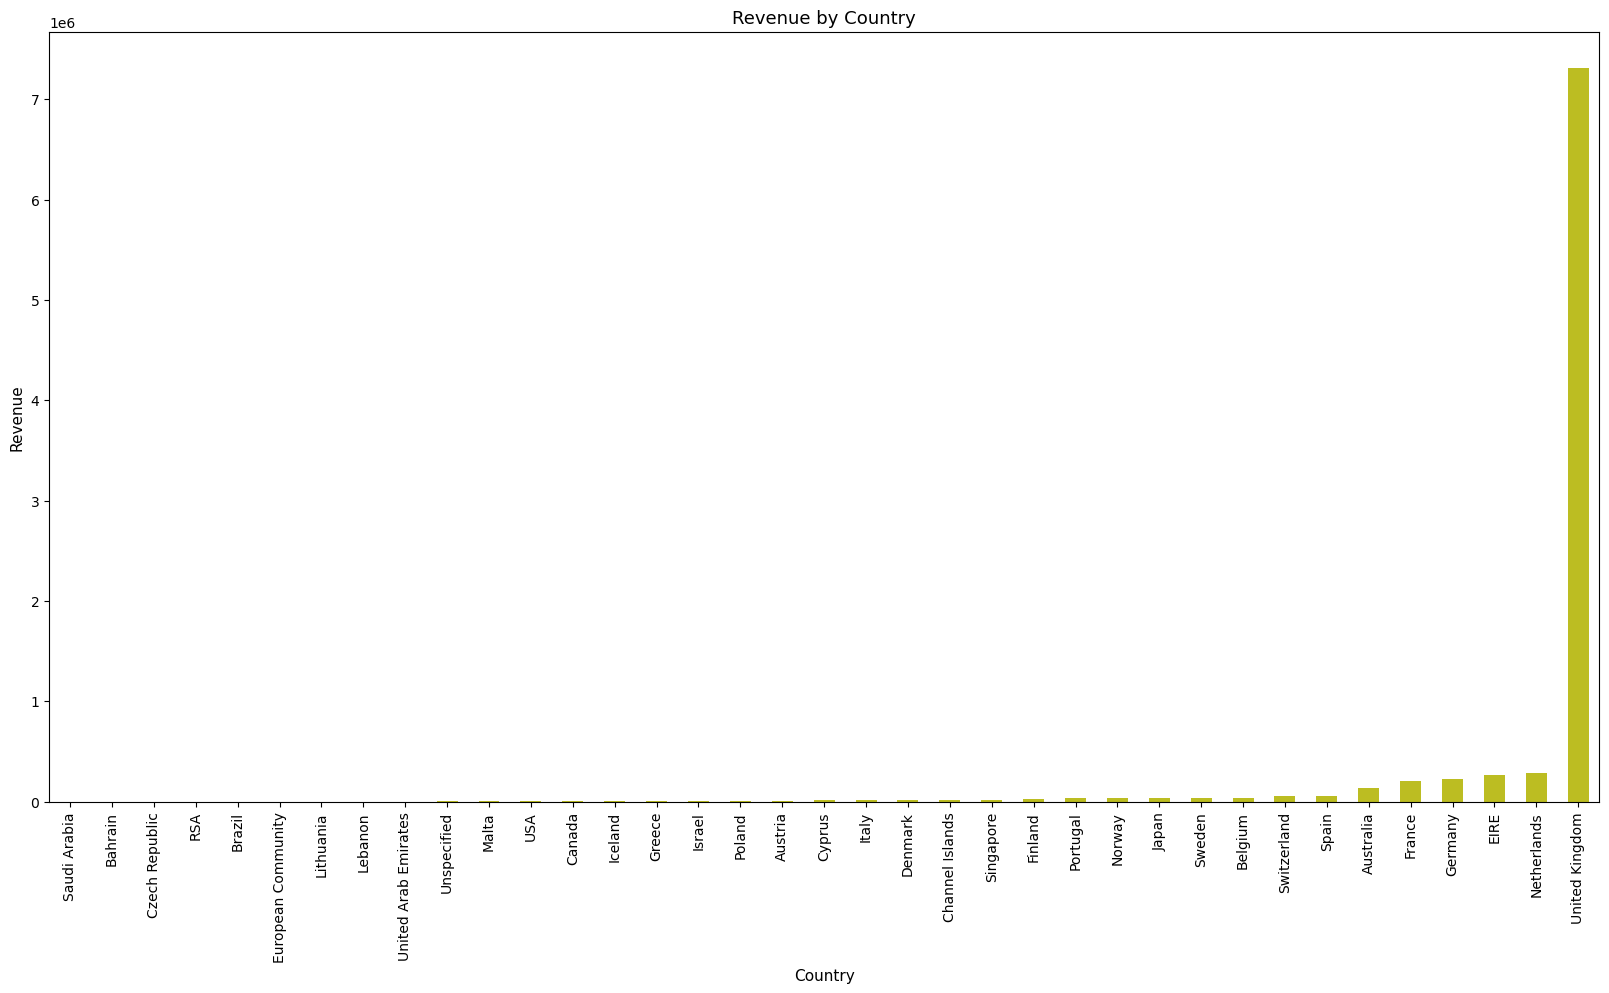

In [162]:
#막대그래프

plot = rev_by_countries.plot(kind = 'bar' , color = COLORS[-2], figsize = (20 , 10))
plot.set_xlabel('Country', fontsize = 11)
plot.set_ylabel('Revenue', fontsize = 11)
plot.set_title('Revenue by Country', fontsize = 13)
plot.set_xticklabels( labels = rev_by_countries['Country'], rotation = 45 )

#영국에만 사업이 집중된 것을 볼 수 있음
rev_by_countries / total_revenue

In [163]:
### 그래프 유틸 함수

def plot_bar (df, xlabel, ylabel, title, color = COLORS[1], figsize = (20, 10), rotation =45) :
    
    plot = df.plot(kind='bar', color = color, figsize = figsize)
    xtick = df['xlabel']
    plot.set_xlabel(xlabel, fontsize=11)
    plot.set_ylabel(ylabel, fontsize=11)
    plot.set_title(title, fontsize=13)
    plot.set_xticklabels(labels=xtick, rotation = rotation)

KeyError: 'xlabel'

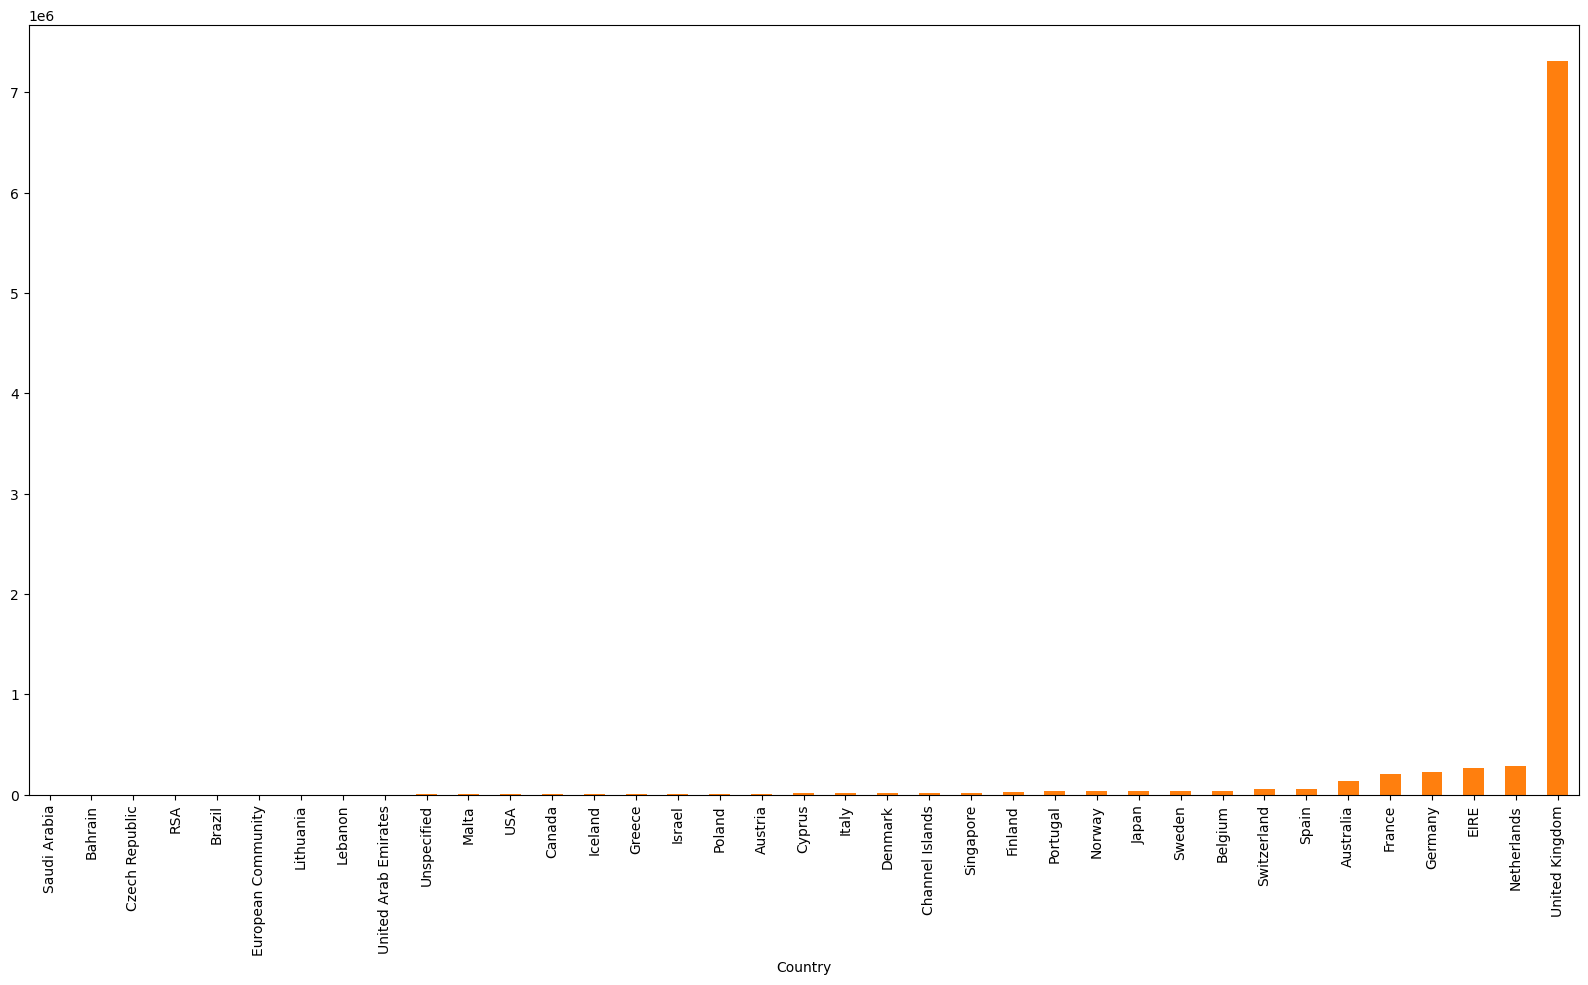

In [164]:
plot_bar(rev_by_countries, 'Country', 'Revenue', 'Revenue by Country')

In [165]:
#월별매출
#일반함수를 만들어보자

def extract_month(date):
    
    month = str(date.month)
    
    if date.month < 10 :
    
        month = '0' + month
    
    return str(date.year) + month

C:\Users\JIWON MOK\AppData\Local\Temp\ipykernel_46608\3105514833.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rev_by_month = retail.set_index("InvoiceDate").groupby(extract_month).sum()['CheckoutPrice']


KeyError: 'xlabel'

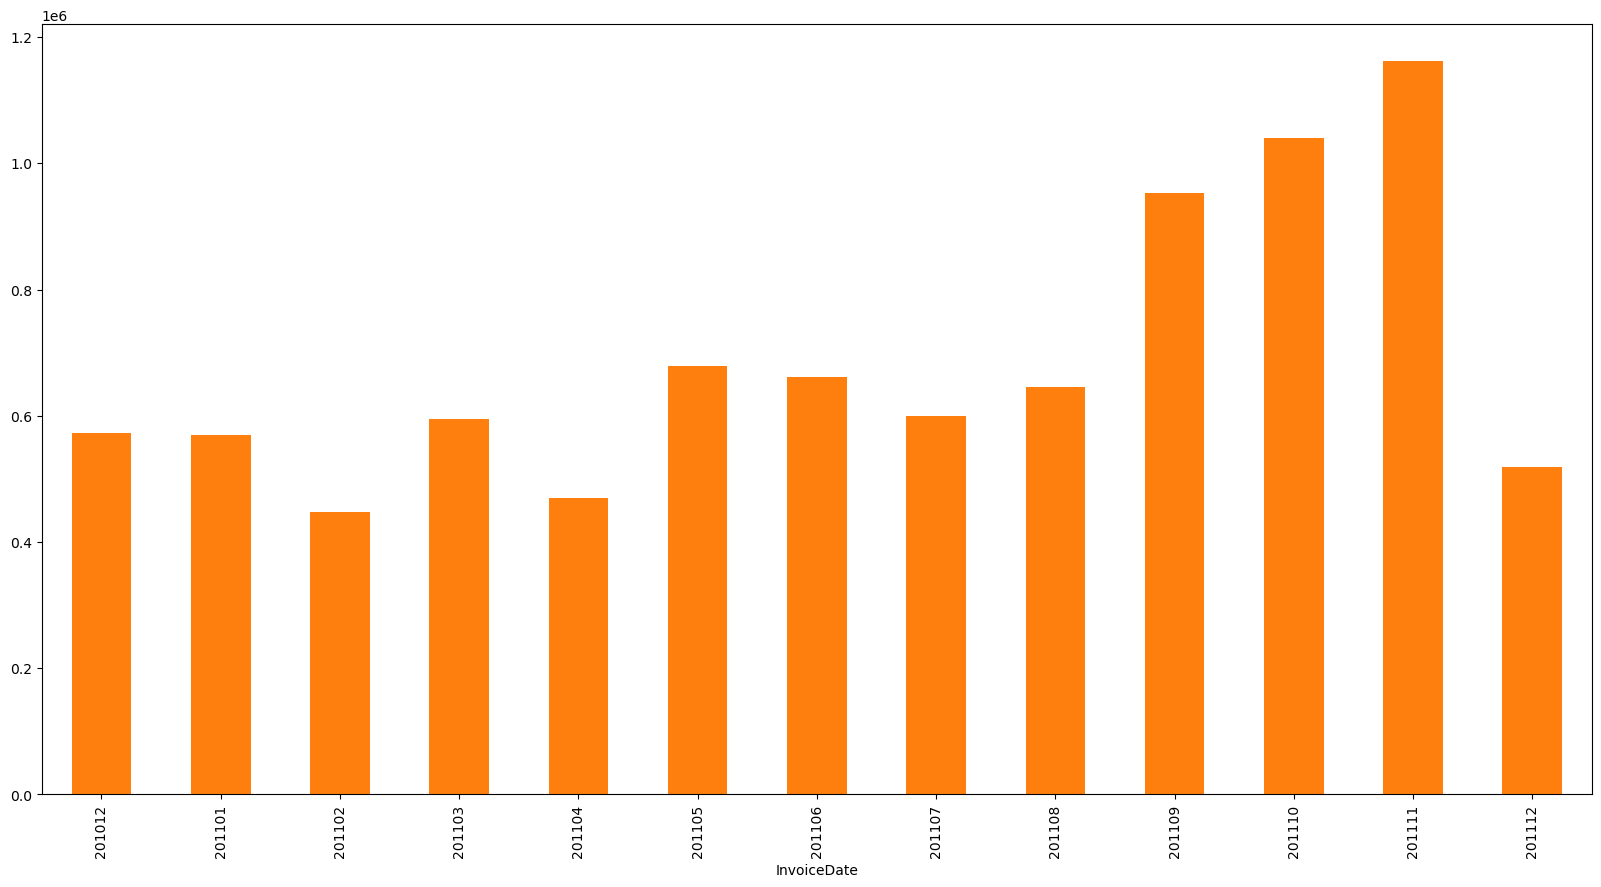

In [92]:
rev_by_month = retail.set_index("InvoiceDate").groupby(extract_month).sum()['CheckoutPrice']
rev_by_month

plot_bar(rev_by_month,'Month','Revenue','Revenue by Month')
retail['InvoiceDate'].sort.values(ascending =False)

C:\Users\JIWON MOK\AppData\Local\Temp\ipykernel_46608\314044287.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rev_by_dow = retail.set_index('InvoiceDate').groupby(lambda date : date.dayofweek).sum()['CheckoutPrice']


KeyError: 'xlabel'

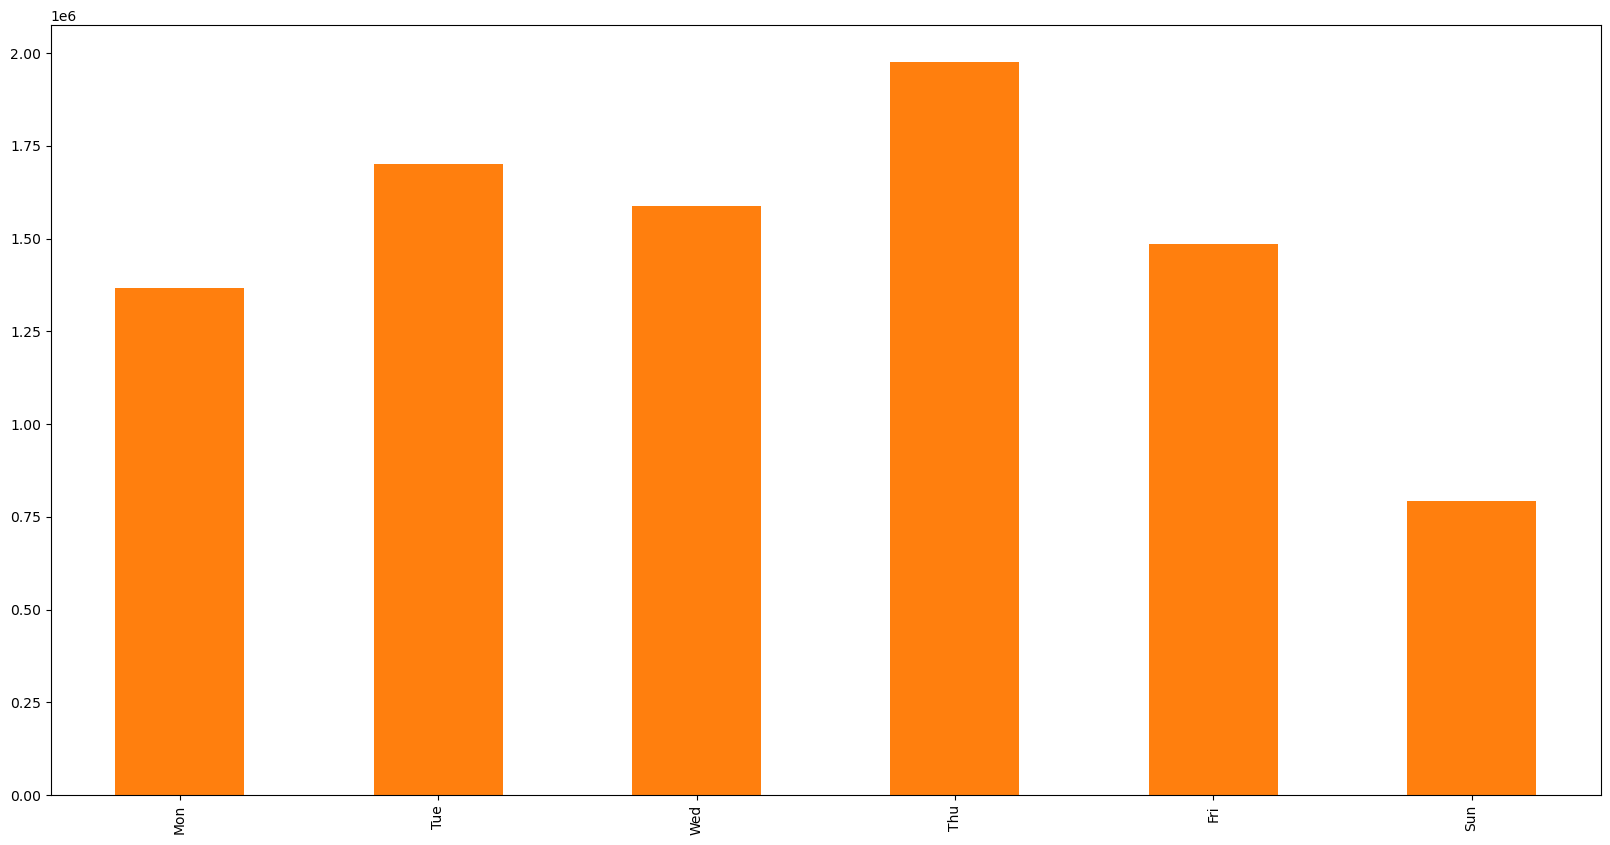

In [166]:
#요일별 매출

rev_by_dow = retail.set_index('InvoiceDate').groupby(lambda date : date.dayofweek).sum()['CheckoutPrice']

DAY_OF_WEEK = np.array(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
rev_by_dow.index = DAY_OF_WEEK[rev_by_dow.index]

plot_bar(rev_by_dow, 'DOW','Revenue','Revenue by DOW')

lambda 람다

lambda 매개변수 : 표현식

>>>> def hap(x, y):
>>>>>>>>return x + y

>>>> hap(10,20)

C:\Users\JIWON MOK\AppData\Local\Temp\ipykernel_46608\3811696144.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rev_by_hour = retail.set_index('InvoiceDate').groupby(lambda date : date.hour).sum()['CheckoutPrice']


KeyError: 'xlabel'

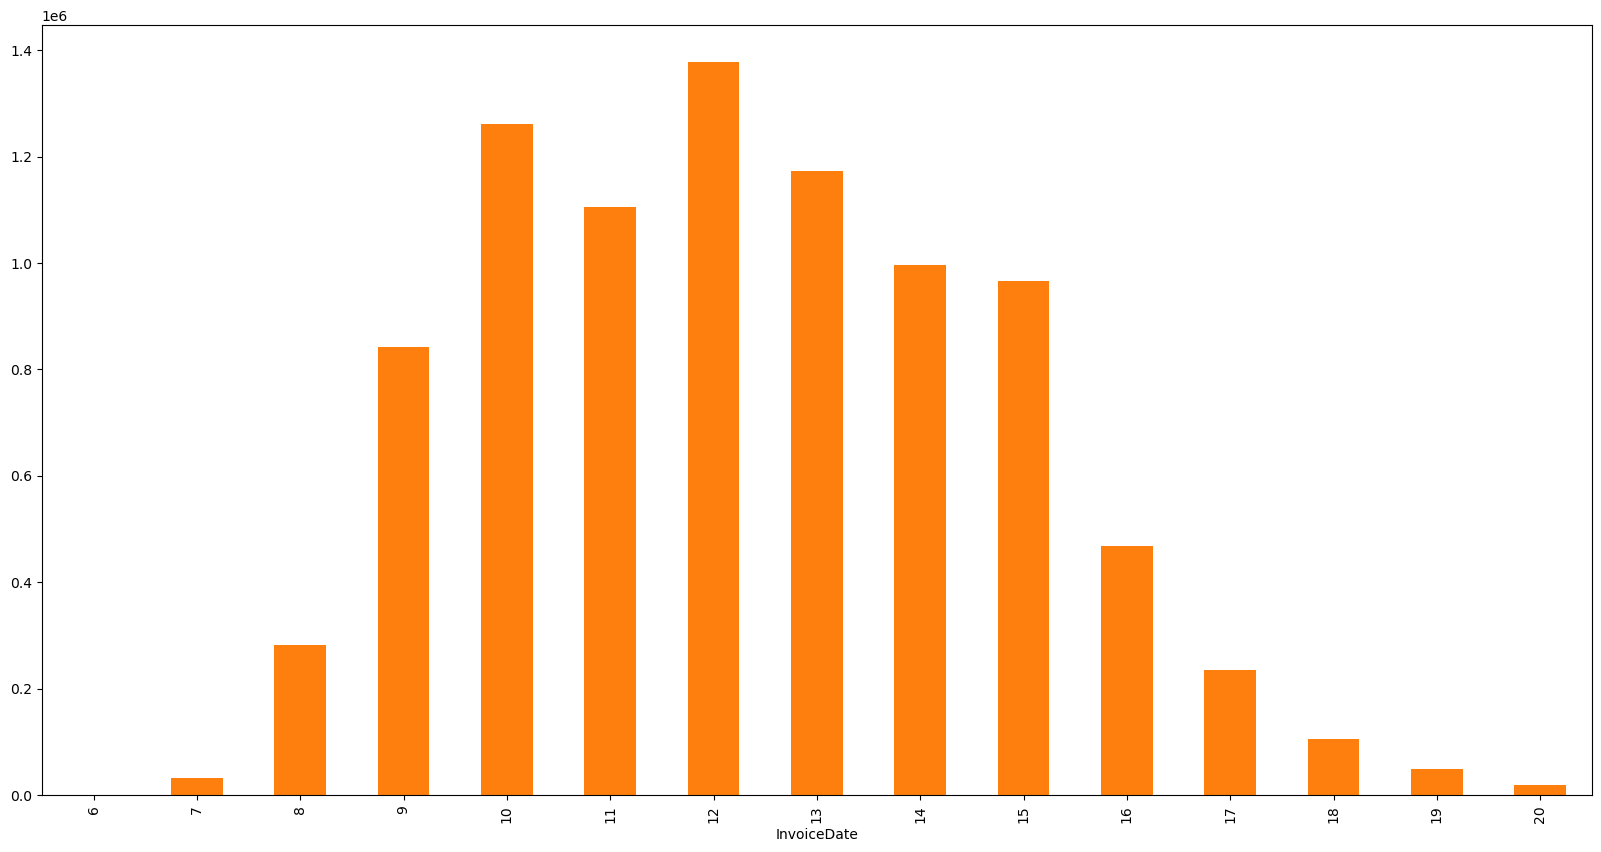

In [103]:
#시간별매출

rev_by_hour = retail.set_index('InvoiceDate').groupby(lambda date : date.hour).sum()['CheckoutPrice']
plot_bar(rev_by_hour, 'hour', ' revenue', 'revenue by hour')

  ***매출 데이터로부터 insight***

 - 전체 매출의 82% 가 UK 에서 발생
 - 11년도의 가장 많은 주문이 발생한 달 11월 (12월의 전체 데이터가 반영 되지 않았음)
 - 11월 12월의 판매량이 압도 (블랙 프라이데이, 사이버먼데이, 크리스마스 휴일)
 - 일주일 중에서 목요일까지는 성장세를 보이다가, 이후로는 하락 (토요일에는 주문이 X)
 - 7시를 시작으로 주문이 시작되어 12시까지는 증가세 15시까지는 하락물, 15시 이후부터는 급락

In [167]:
### 제품별 METRICS ###

### TOP 10 판매 / 매출 제품
## TOP 10 판매

top_selling = retail.groupby('StockCode').sum()['Quantity'].sort_values(ascending=False)[:10]
print(top_selling)

StockCode
23843     80995
23166     77916
84077     54415
22197     49183
85099B    46181
85123A    36782
84879     35362
21212     33693
23084     27202
22492     26076
Name: Quantity, dtype: int32


C:\Users\JIWON MOK\AppData\Local\Temp\ipykernel_46608\1433488393.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_selling = retail.groupby('StockCode').sum()['Quantity'].sort_values(ascending=False)[:10]


In [168]:
#TOP 10 매출

top_revenue = retail.groupby("StockCode").sum()['CheckoutPrice'].sort_values(ascending=False)[:10]
print(top_selling)

StockCode
23843     80995
23166     77916
84077     54415
22197     49183
85099B    46181
85123A    36782
84879     35362
21212     33693
23084     27202
22492     26076
Name: Quantity, dtype: int32


C:\Users\JIWON MOK\AppData\Local\Temp\ipykernel_46608\1296335528.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_revenue = retail.groupby("StockCode").sum()['CheckoutPrice'].sort_values(ascending=False)[:10]


C:\Users\JIWON MOK\AppData\Local\Temp\ipykernel_46608\2781748843.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_top3 = retail.set_index('InvoiceDate').groupby(['StockCode', extract_month]).sum()[['Quantity', 'CheckoutPrice']].loc[top_selling.index]


KeyError: 'xlabel'

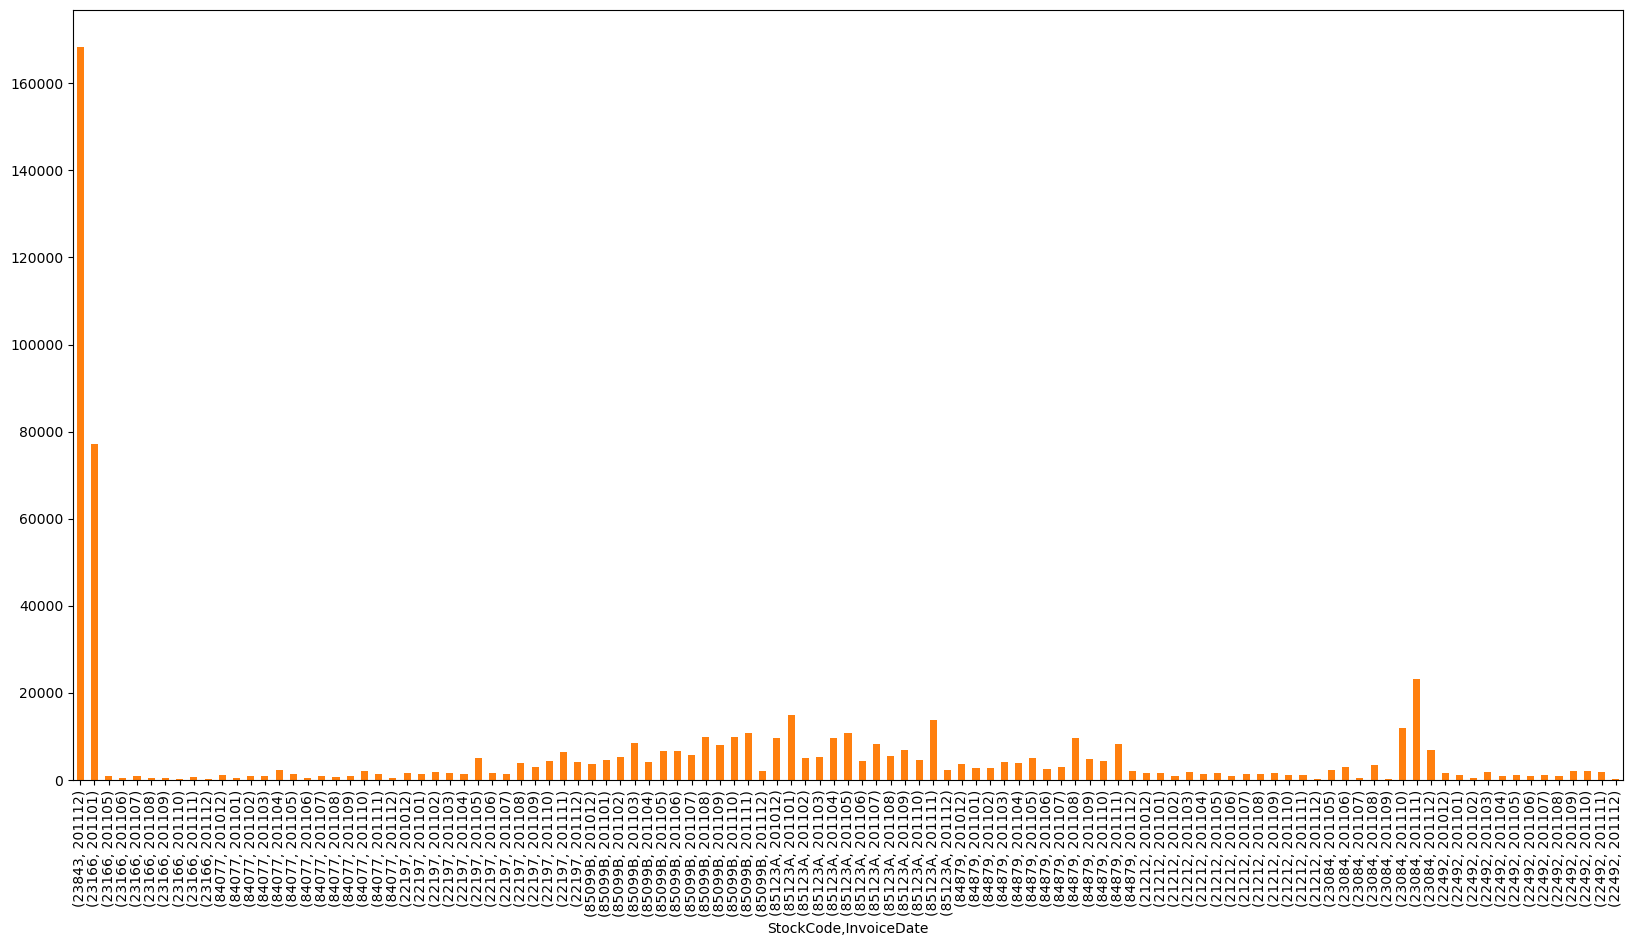

In [169]:
#top 3 아이템의 월별 판매량 추이
monthly_top3 = retail.set_index('InvoiceDate').groupby(['StockCode', extract_month]).sum()[['Quantity', 'CheckoutPrice']].loc[top_selling.index]
plot_bar(monthly_top3['CheckoutPrice'],'Product/Month','Revenue','Revenue of Top3')

In [120]:
##우수고객 선별하기 (가장 소비를 많이한 고객) , 고객 코호트 분석
# 소비 우수고객 찾기
# 고객 Retention

from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [ ]:
dtypes = {
    
    'UnitPrice' : np.float32,
    'CustomerID' : np.int32,
    'Quantity' : np.int32
    
}

retail = pd.read_csv('./OnlineRetailClean.csv', dtype = dtypes)
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], infer_datetime_format=True)
retail.head()

In [122]:
#우수고객확인
#고객 횟수 기준
retail.groupby('CustomerID').count()['Quantity'].sort_values(ascending=False)

CustomerID
17841    7847
14911    5675
14096    5111
12748    4595
14606    2700
         ... 
17846       1
13017       1
13099       1
13106       1
12346       1
Name: Quantity, Length: 4338, dtype: int64

In [170]:
#지불 금액 기준
retail.groupby('CustomerID').sum()['CheckoutPrice'].sort_values(ascending=False)

C:\Users\JIWON MOK\AppData\Local\Temp\ipykernel_46608\2208097095.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  retail.groupby('CustomerID').sum()['CheckoutPrice'].sort_values(ascending=False)


CustomerID
14646    280206.019436
18102    259657.298465
17450    194550.790953
16446    168472.493821
14911    143825.059345
             ...      
16878        13.300000
17956        12.750000
16454         6.900000
14792         6.200000
16738         3.750000
Name: CheckoutPrice, Length: 4338, dtype: float64

#사용자 retention 분석
- 월간 사용자 cohort를 바탕으로 월별 재구매율 ( Retention ) 분석하기
- Heatmap 으로 한눈에 재구매율을 파악 가능

#사용자 기준으로 최초 구매한 월 (Month) 연산하기
- Month : 구매월 ( 일 - day ) 를 무시
- MonthStarted : 사용자가 최초 구매한 달

In [126]:
# step 01.Month 라는 필드를 추가

def get_month_as_datetime(date) :
    
    return datetime(date.year, date.month, 1)

retail['Month'] = retail['InvoiceDate'].apply(get_month_as_datetime)

month_group = retail.groupby('CustomerID')['Month']
retail['MonthStarted'] = month_group.transform(np.min) # 최초로 구매를 한 달을 나타냄

In [171]:
# 기준이 되는 월과 실제 구매 월의 차이 계산하기
# 각 구매가 최초 구매로부터 얼마의 월이 지났는지 연산
# MonthPassed : 최초 구매월로부터의 월 차이

retail['MonthPassed'] = \
(retail['Month'].dt.year - retail['MonthStarted'].dt.year)*12 + (retail['Month'].dt.month - retail['MonthStarted'].dt.month)


In [172]:
# 기준 월, MonthPassed 를 기준으로 고객 카운팅
# 기준이 되는 월과 그 월로부터의 지난 기간의 고객수를 계산

def get_unique_no(x) :
    return len(np.unique(x))

cohort_group = retail.groupby(['MonthStarted', 'MonthPassed'])
cohort_df = cohort_group['CustomerID'].apply(get_unique_no).reset_index() #pivot를 위해서 indexing 삭제
cohort_df

,MonthStarted,MonthPassed,CustomerID
0,2010-12-01,0,885
1,2010-12-01,1,324
2,2010-12-01,2,286
3,2010-12-01,3,340
4,2010-12-01,4,321
...,...,...,...
86,2011-10-01,1,86
87,2011-10-01,2,41
88,2011-11-01,0,323
89,2011-11-01,1,36


In [173]:
# 테이블 피벗
## Pivot 함수를 이용하여 Index 는 Monthstarted, Columns을 MonthPassed 로 변경하여 테이블 변경
## 첫번째 Column 을 기준으로 100 분위 연산

In [174]:
cohort_df = cohort_df.pivot(index = 'MonthStarted', columns = "MonthPassed")
cohort_df.head()

CustomerID                                                   \
MonthPassed          0      1      2      3      4      5      6      7    
MonthStarted                                                               
2010-12-01        885.0  324.0  286.0  340.0  321.0  352.0  321.0  309.0   
2011-01-01        417.0   92.0  111.0   96.0  134.0  120.0  103.0  101.0   
2011-02-01        380.0   71.0   71.0  108.0  103.0   94.0   96.0  106.0   
2011-03-01        452.0   68.0  114.0   90.0  101.0   76.0  121.0  104.0   
2011-04-01        300.0   64.0   61.0   63.0   59.0   68.0   65.0   78.0   

                                                 
MonthPassed      8      9      10     11     12  
MonthStarted                                     
2010-12-01    313.0  350.0  331.0  445.0  235.0  
2011-01-01    125.0  136.0  152.0   49.0    NaN  
2011-02-01     94.0  116.0   26.0    NaN    NaN  
2011-03-01    126.0   39.0    NaN    NaN    NaN  
2011-04-01     22.0    NaN    NaN    NaN    NaN

In [175]:
customer_cohort = cohort_df.div(cohort_df.iloc[:,0], axis=0)*100 #첫번째 열을 기준으로 한 백분위
customer_cohort = customer_cohort.round(decimals=2)

customer_cohort

CustomerID                                                   \
MonthPassed          0      1      2      3      4      5      6      7    
MonthStarted                                                               
2010-12-01        100.0  36.61  32.32  38.42  36.27  39.77  36.27  34.92   
2011-01-01        100.0  22.06  26.62  23.02  32.13  28.78  24.70  24.22   
2011-02-01        100.0  18.68  18.68  28.42  27.11  24.74  25.26  27.89   
2011-03-01        100.0  15.04  25.22  19.91  22.35  16.81  26.77  23.01   
2011-04-01        100.0  21.33  20.33  21.00  19.67  22.67  21.67  26.00   
2011-05-01        100.0  19.01  17.25  17.25  20.77  23.24  26.41   9.51   
2011-06-01        100.0  17.36  15.70  26.45  23.14  33.47   9.50    NaN   
2011-07-01        100.0  18.09  20.74  22.34  27.13  11.17    NaN    NaN   
2011-08-01        100.0  20.71  24.85  24.26  12.43    NaN    NaN    NaN   
2011-09-01        100.0  23.41  30.10  11.37    NaN    NaN    NaN    NaN   
2011-10-01        100.0  24.02  11.45    NaN    NaN    NaN    NaN    NaN   
2011-11-01        100.0  11.15    NaN    NaN    NaN    NaN    NaN    NaN   
2011-12-01        100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                                                 
MonthPassed      8      9      10     11     12  
MonthStarted                                     
2010-12-01    35.37  39.55  37.40  50.28  26.55  
2011-01-01    29.98  32.61  36.45  11.75    NaN  
2011-02-01    24.74  30.53   6.84    NaN    NaN  
2011-03-01    27.88   8.63    NaN    NaN    NaN  
2011-04-01     7.33    NaN    NaN    NaN    NaN  
2011-05-01      NaN    NaN    NaN    NaN    NaN  
2011-06-01      NaN    NaN    NaN    NaN    NaN  
2011-07-01      NaN    NaN    NaN    NaN    NaN  
2011-08-01      NaN    NaN    NaN    NaN    NaN  
2011-09-01      NaN    NaN    NaN    NaN    NaN  
2011-10-01      NaN    NaN    NaN    NaN    NaN  
2011-11-01      NaN    NaN    NaN    NaN    NaN  
2011-12-01      NaN    NaN    NaN    NaN    NaN

In [176]:
#heatmap from cohort analysis
# seaborn의 heatmap 함수로 visualization

ValueError: Format specifier missing precision

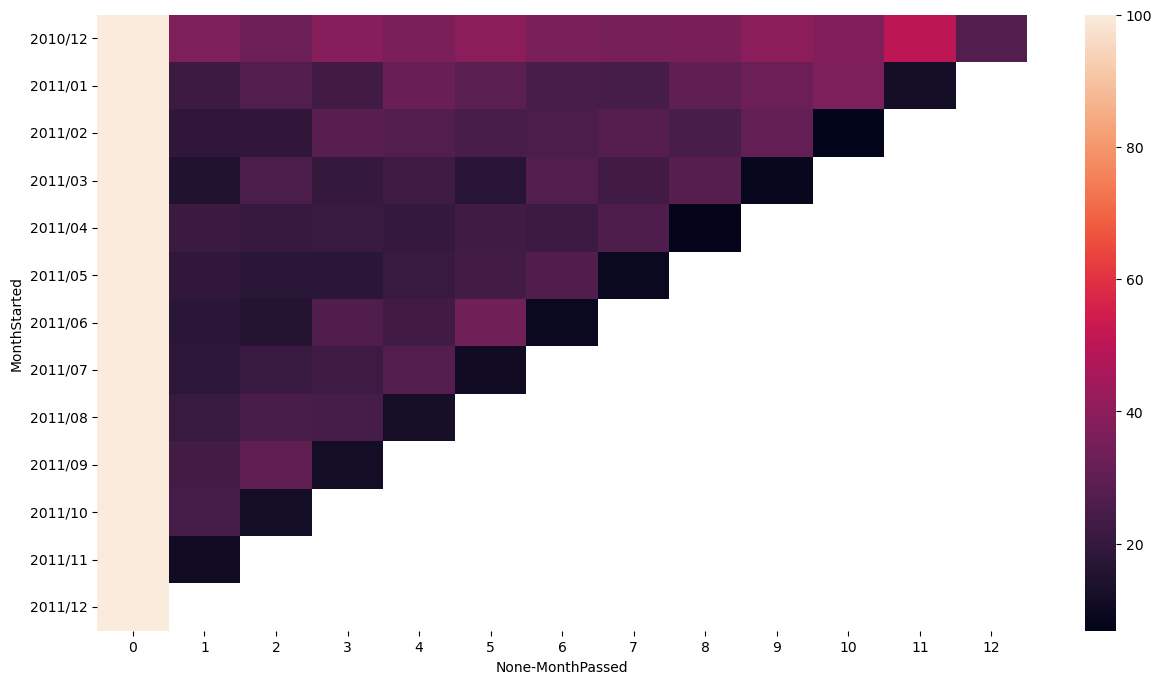

In [178]:
xticks = np.arange(0,13)
yticks = ['2010/12', '2011/01', '2011/02', '2011/03','2011/04','2011/05','2011/06','2011/07','2011/08','2011/09','2011/10','2011/11',
         '2011/12']

plt.figure(figsize = (15,8))
sns.heatmap(customer_cohort,
           annot=True,
           xticklabels = xticks,
           yticklabels = yticks,
           fmt = '.lf')

쿠폰 발송을 할때, Push는 언제 보내는게 좋을까?
- A : 고객에게 쿠폰 발송을 한다고 기획하고, 회의를 한다고 가정해보겠습니다.
- B : 아침에 출퇴근 시간에 보내는게 좋을까요?
- C : 점심 먹고 졸린데 그때 보내보죠?
- D : 흠 자기전에 스마트폰 많이 하던데 그때는 어떨까요?
- A : 그러면 평균 시간을 내볼까요?
- K : 이 데이터를 확인해보는게 맞지 않을까요? 언제 고객이 주로 주문을 하는지?

위에서 처럼 실제로 회의를 하다보면 의사결정이 본인/ 주변의 경험에 의해서 이뤄지는 것을 많이 볼 수 있습니다.
주문이 이뤄지는 시간을 고려하지 않고 막무가내로 보낸다면 아무 의미가 없고 추후 같은 이벤트 발생시에도 판단 근거가 없게 됨.
현 상태에서는 가장 많이 주문이 일어나는 시점에서 하는 것이 가장 직관적인 판단

- 1. 데이터로 파악
- 2. 가설 제시
- 3. 가설 검증
- 4. 1~3 회 반복

시간(hour, minute) 과 주로 관련되기 때문에 역시 InvoiceDate 가중요한 Feature

In [180]:
#고객이 가장 많이 주문을 하는 시간대

order_by_hour = retail.set_index('InvoiceDate').groupby(lambda date : date.hour).count()['CustomerID']
order_by_hour

InvoiceDate
6         1
7       379
8      8690
9     21944
10    37997
11    49084
12    72065
13    64026
14    54118
15    45369
16    24089
17    13071
18     2928
19     3321
20      802
Name: CustomerID, dtype: int64

KeyError: 'xlabel'

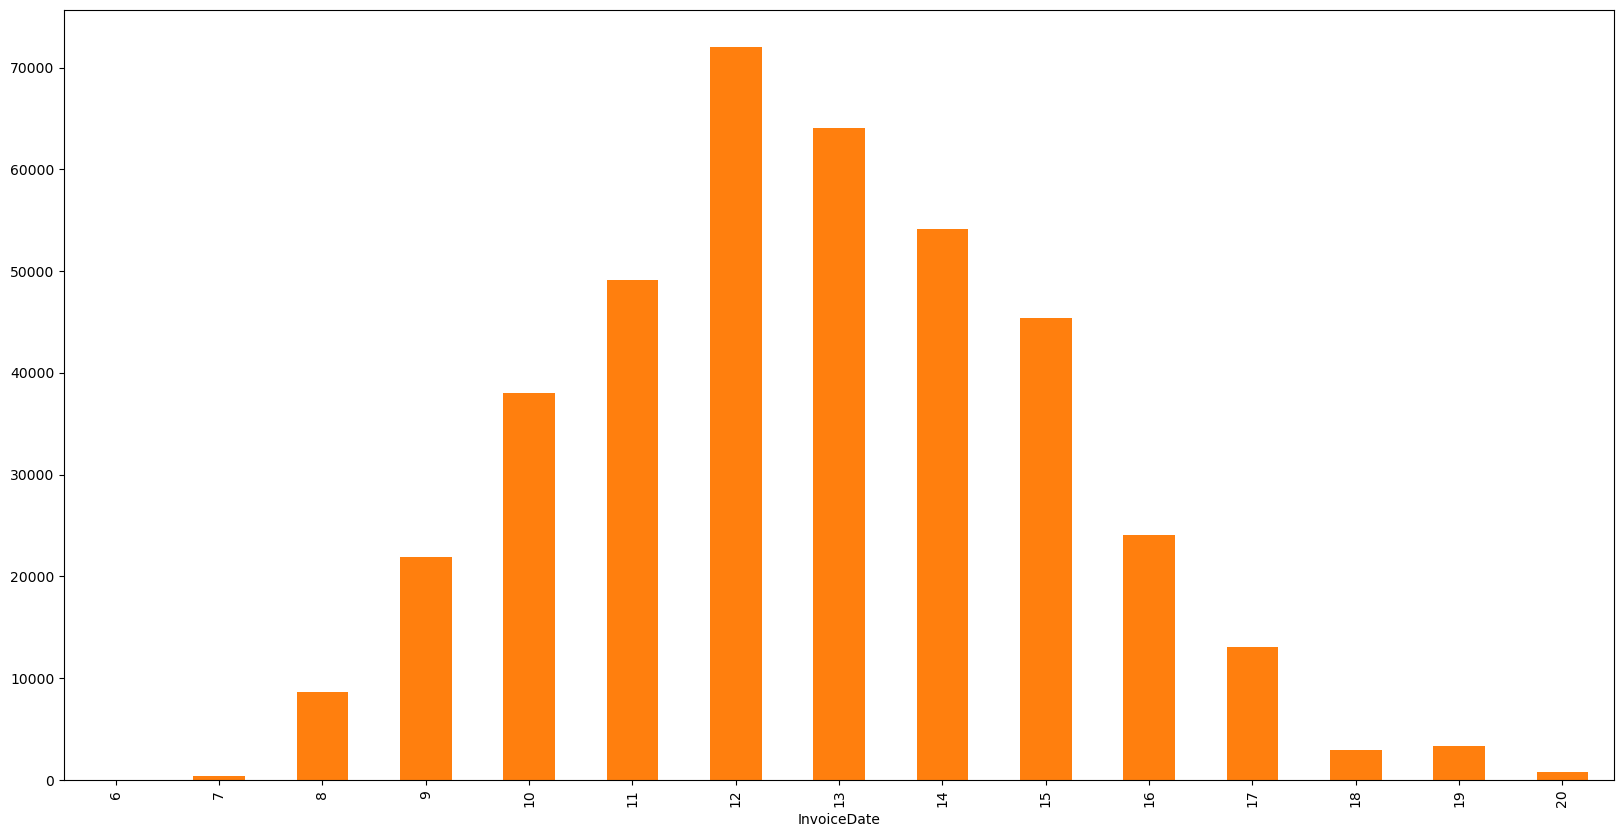

In [181]:
plot_bar(order_by_hour, 'hour', '#orders', 'Order by hour')

In [183]:
def half_an_hour(date):
    minute = ':00'
    if date.minute > 30 :
        minute = ":30"
    
    hour = str(date.hour) #문자열로 바꾸기
    if date.hour < 10 :
        hour = "0" + hour
    
    return hour + minute

In [185]:
# 30분 단위로 쪼갰을때는? 

order_by_hour_half = retail.set_index('InvoiceDate').groupby(half_an_hour).count()['CustomerID']
order_by_hour_half

InvoiceDate
06:00        1
07:30      379
08:00     3145
08:30     5545
09:00     9364
09:30    12580
10:00    16950
10:30    21047
11:00    18925
11:30    30159
12:00    37174
12:30    34891
13:00    31131
13:30    32895
14:00    26958
14:30    27160
15:00    24227
15:30    21142
16:00    14316
16:30     9773
17:00     8889
17:30     4182
18:00     1715
18:30     1213
19:00     1534
19:30     1787
20:00      802
Name: CustomerID, dtype: int64

KeyError: 'xlabel'

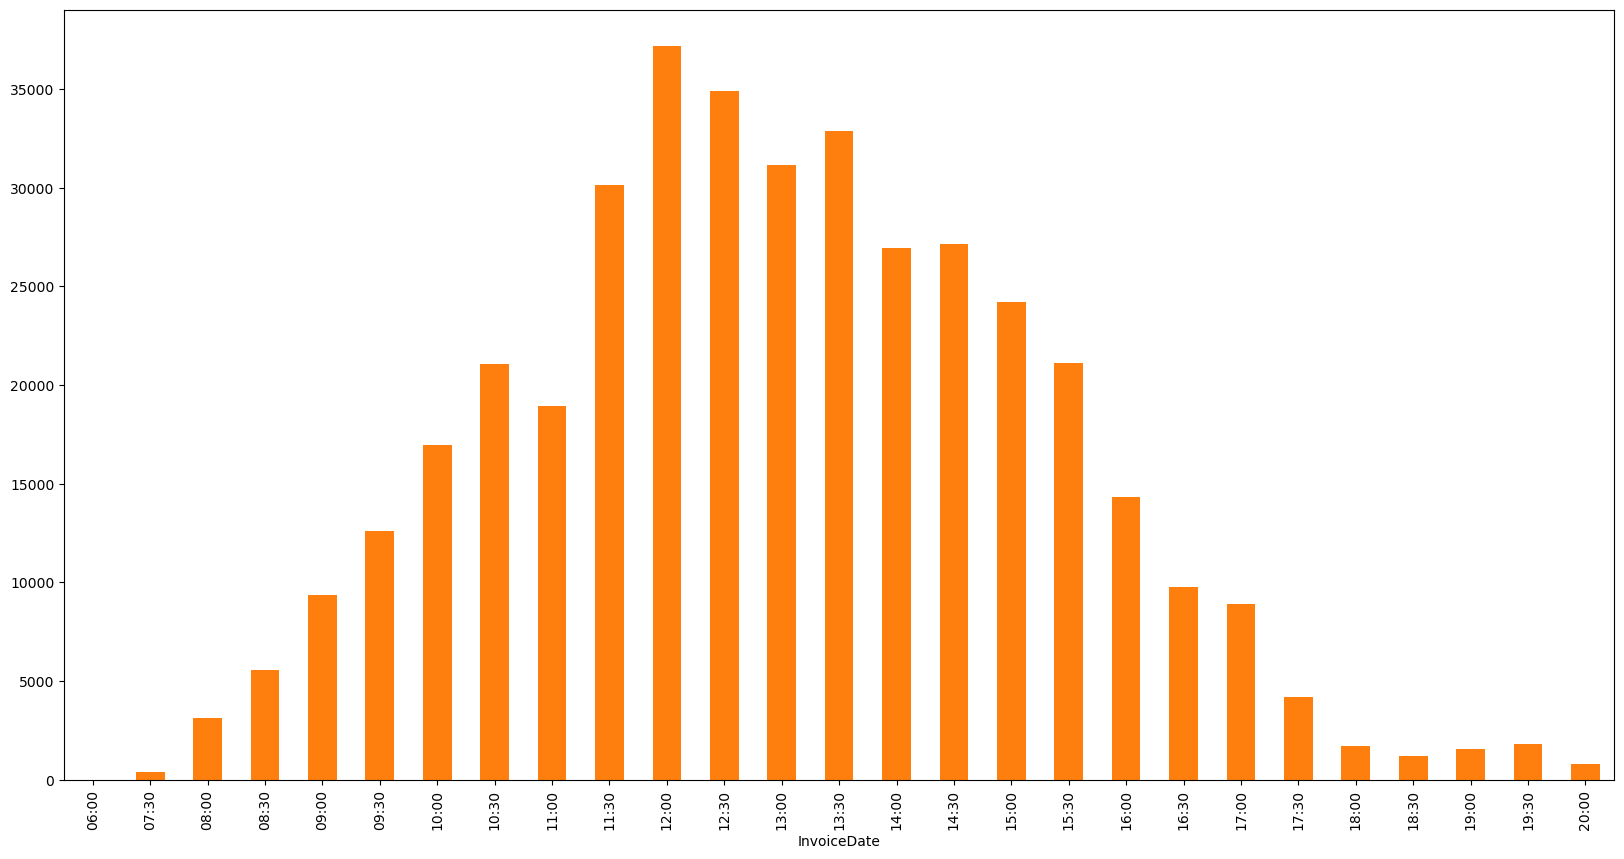

In [186]:
plot_bar(order_by_hour_half, 'half an hour' , '# orders', 'order by half an hour')

In [187]:
# 평균치를 구하다가 보면 이 부분을 제외하고는 나머지 부분의 비율이 높기 때문에 전체의 합을 기준으로 봤을때는 일부분의 불가

order_by_hour_half /order_by_hour_half.sum()

InvoiceDate
06:00    0.000003
07:30    0.000953
08:00    0.007904
08:30    0.013936
09:00    0.023534
09:30    0.031617
10:00    0.042600
10:30    0.052897
11:00    0.047564
11:30    0.075798
12:00    0.093429
12:30    0.087691
13:00    0.078241
13:30    0.082675
14:00    0.067753
14:30    0.068261
15:00    0.060890
15:30    0.053136
16:00    0.035980
16:30    0.024562
17:00    0.022341
17:30    0.010511
18:00    0.004310
18:30    0.003049
19:00    0.003855
19:30    0.004491
20:00    0.002016
Name: CustomerID, dtype: float64

개인화된 push notifications
최적의 솔루션을 찾는 것이 트렌드가 됨 
사용자별로 소비의 패턴이 다를 수 있기 때문에 가장 많은 구매한 시간대를 찾아서 해당 시간대에 쿠폰을 발송

In [191]:
#사용자별로 각 시간별 주문 량 계산하기

order_count_by_hour = retail.set_index('InvoiceDate').groupby(['CustomerID', lambda date : date.hour]).count()['StockCode']
order_count_by_hour

CustomerID  InvoiceDate
12346       10              1
12347       8              22
            10             24
            12             47
            13             18
                           ..
18283       15              1
            16             56
            19             87
18287       9               3
            10             67
Name: StockCode, Length: 11205, dtype: int64

In [192]:
order_count_by_hour.loc[12347]

InvoiceDate
8     22
10    24
12    47
13    18
14    60
15    11
Name: StockCode, dtype: int64

In [197]:
#사용자별 최대 주문 시간 계산하기
#최대값을 갖는 index를 반환
idx = order_count_by_hour.groupby('CustomerID').idxmax()

In [202]:
#해당 시간 indexing

result = order_count_by_hour.loc[idx]
result

CustomerID  InvoiceDate
12346       10               1
12347       14              60
12348       19              17
12349       9               73
12350       16              17
                          ... 
18280       9               10
18281       10               7
18282       13               7
18283       14             201
18287       10              67
Name: StockCode, Length: 4338, dtype: int64

In [209]:
#result.reset_index().groupby('level_1').groups

5. 로그데이터를 파악하여 고객 이탈 페이지 확인하기

웹서버 로그 데이터

 - 웹서버에 클라이언트로의 요청 전달 시, 해당 요청에 대한 정보 ( ip, 시각, 방문 페이지 등등 )을 기록하는 파일
 - 기록되는 로그의 포멧(format) 의 표준이 있으나 설정으로 포맷 변경 가능
 - 로그 데이터는 주로 웹 서버의 디버깅, 데이터 분석 등의 형태로 사용 됨
 - 매체에서 사용되는 형식
     : ip 세션 아이디 사용자식별자 시각 요청 페이지 상태코드 바이트사이즈
     
          1.0.0.1 sessionid user59 [16/Dec/2019:02:00:08] GET /checkout 200 1508

In [224]:
logs = pd.read_csv('/Users/JIWON MOK/Desktop/project/shoppingmall/Data/web.log',
                 sep = '\s',
                 engine = 'python',
                 names = ['ip', 'session_id', 'user_id','datetime','request','url','status','bytesize'] )

logs

#200은 성공을 의미한다 

,ip,session_id,user_id,datetime,request,url,status,bytesize
0,4.5.4.5,69de169f-6eed-4e4d-ae5b-ff997b8c889f,user89,[01/Dec/2019T00:47:11],GET,/product_list,200,2107
1,4.5.4.5,69de169f-6eed-4e4d-ae5b-ff997b8c889f,user89,[01/Dec/2019T00:51:21],GET,/product_detail,200,1323
2,3.3.3.3.,3d46aad9-17eb-4af1-bc54-6ca91d7f8f6c,user2,[01/Dec/2019T00:51:43],GET,/product_list,200,2616
3,1.0.1.0,57623182-b78b-4bdc-b977-a2b34612c6d1,user45,[01/Dec/2019T01:04:02],GET,/product_list,200,2303
4,3.3.3.3.,3d46aad9-17eb-4af1-bc54-6ca91d7f8f6c,user2,[01/Dec/2019T01:12:28],GET,/product_detail,200,1830
...,...,...,...,...,...,...,...,...
1285,1.0.0.3,ef2d546d-aa5d-4d9f-89be-70df7cb1082a,user4,[20/Dec/2019T12:08:14],GET,/checkout,200,1825
1286,1.0.1.0,63d1f1f5-3a1e-4fbd-819c-cef61af66a6a,user79,[20/Dec/2019T12:23:02],GET,/product_list,200,2548
1287,1.0.1.0,63d1f1f5-3a1e-4fbd-819c-cef61af66a6a,user79,[20/Dec/2019T12:56:12],GET,/product_detail,200,1250
1288,1.0.1.0,63d1f1f5-3a1e-4fbd-819c-cef61af66a6a,user79,[20/Dec/2019T13:12:27],GET,/cart,200,2590


In [225]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ip          1290 non-null   object
 1   session_id  1290 non-null   object
 2   user_id     1290 non-null   object
 3   datetime    1290 non-null   object
 4   request     1290 non-null   object
 5   url         1290 non-null   object
 6   status      1290 non-null   int64 
 7   bytesize    1290 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 80.8+ KB


In [226]:
logs.describe()

,status,bytesize
count,1290.0,1290.000000
mean,200.0,2010.652713
std,0.0,461.567919
min,200.0,1200.000000
25%,200.0,1615.750000
50%,200.0,2018.000000
75%,200.0,2408.750000
max,200.0,2798.000000


In [227]:
#날짜 형식 변환
#[01/Dec/2019T00:47:11
logs['datetime'] = logs['datetime'].apply(lambda date : date.replace('[','').replace(']',''))
logs['datetime'] = pd.to_datetime(logs['datetime'], format = '%d/%b/%YT%H:%M:%S')

logs.head()

,ip,session_id,user_id,datetime,request,url,status,bytesize
0,4.5.4.5,69de169f-6eed-4e4d-ae5b-ff997b8c889f,user89,2019-12-01 00:47:11,GET,/product_list,200,2107
1,4.5.4.5,69de169f-6eed-4e4d-ae5b-ff997b8c889f,user89,2019-12-01 00:51:21,GET,/product_detail,200,1323
2,3.3.3.3.,3d46aad9-17eb-4af1-bc54-6ca91d7f8f6c,user2,2019-12-01 00:51:43,GET,/product_list,200,2616
3,1.0.1.0,57623182-b78b-4bdc-b977-a2b34612c6d1,user45,2019-12-01 01:04:02,GET,/product_list,200,2303
4,3.3.3.3.,3d46aad9-17eb-4af1-bc54-6ca91d7f8f6c,user2,2019-12-01 01:12:28,GET,/product_detail,200,1830


In [228]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ip          1290 non-null   object        
 1   session_id  1290 non-null   object        
 2   user_id     1290 non-null   object        
 3   datetime    1290 non-null   datetime64[ns]
 4   request     1290 non-null   object        
 5   url         1290 non-null   object        
 6   status      1290 non-null   int64         
 7   bytesize    1290 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 80.8+ KB


In [229]:
#어떤 페이지에서 고객이 많이 이탈될까?
#해당 페이지를 분석하고 최종 단계로 더 많이 유도 가능 // 대부분의 경우, 다음 스텝으로 넘어갈때의 장벽이 높은 경우가 해당됨.

logs.head()

,ip,session_id,user_id,datetime,request,url,status,bytesize
0,4.5.4.5,69de169f-6eed-4e4d-ae5b-ff997b8c889f,user89,2019-12-01 00:47:11,GET,/product_list,200,2107
1,4.5.4.5,69de169f-6eed-4e4d-ae5b-ff997b8c889f,user89,2019-12-01 00:51:21,GET,/product_detail,200,1323
2,3.3.3.3.,3d46aad9-17eb-4af1-bc54-6ca91d7f8f6c,user2,2019-12-01 00:51:43,GET,/product_list,200,2616
3,1.0.1.0,57623182-b78b-4bdc-b977-a2b34612c6d1,user45,2019-12-01 01:04:02,GET,/product_list,200,2303
4,3.3.3.3.,3d46aad9-17eb-4af1-bc54-6ca91d7f8f6c,user2,2019-12-01 01:12:28,GET,/product_detail,200,1830


session_id, product_list, product_detail, cart, order_complete
1               XXXX         YYYY           N         N 

In [238]:
# 퍼널 스텝 DATAFRAME  생성

# 스텝 순서 (ORDERING) 등을 명시하기 위해 사용

funnel_dict = {'/product_list' : 1, '/product_detail' : 2, '/cart' : 3, '/order_complete' : 4}
funnel_steps = pd.DataFrame.from_dict(funnel_dict, orient = 'index' , columns = ['step_no'])

funnel_steps

,step_no
/product_list,1
/product_detail,2
/cart,3
/order_complete,4


In [239]:
#session, url 로 grouping

# user_id 가 아닌 session 을 기준으로 삼는 이유는 동일한 유저가 다른 세션으로 접속한 경우도 다른 경우로 간주해야하기 때문
# session_id 과 url 로 그루핑하여 가장 시간대가 빠른 해당 이벤트에 대해 추출

grouped = logs.groupby(['session_id', 'url'])['datetime'].agg(np.min)
grouped = pd.DataFrame(grouped).merge(funnel_steps, left_on='url', right_index=True)

grouped.tail()

,,datetime,step_no
session_id,url,,
ed374836-99eb-4e31-8b0d-40e39d38bd54,/order_complete,2019-12-08 03:42:01,4
ef2c3b91-b701-4d46-85ac-96607f0fccc1,/order_complete,2019-12-16 05:48:56,4
f25e918d-f47e-4704-a923-19f1e106f618,/order_complete,2019-12-18 07:36:20,4
f8010232-b6c0-4364-9e9a-f8cc88588ebb,/order_complete,2019-12-06 12:30:47,4
f93ce85d-b7e6-4619-9756-6a7876a25520,/order_complete,2019-12-07 10:40:03,4


In [ ]:
#퍼널 테이블 생성
#각 퍼널의 스텝이 순서대로 columns로 오도록 변경해야함.

In [240]:
funnel = grouped.reset_index().pivot(index='session_id', columns='step_no', values = 'datetime')
funnel.columns = funnel_steps.index
funnel.head()

,/product_list,/product_detail,/cart,/order_complete
session_id,,,,
000d99d8-d2d4-4e9a-bb06-69b1ae6442d9,2019-12-01 11:52:32,2019-12-01 12:06:39,NaT,NaT
0155049d-32e7-44de-9b0d-4c02f63d6099,2019-12-04 00:12:47,2019-12-04 00:22:44,NaT,NaT
020d4536-1341-4de1-87d3-e22ba8611af6,2019-12-19 06:22:54,2019-12-19 06:25:48,2019-12-19 06:58:23,NaT
0381411a-78d8-4c27-9622-3210b7ed62d6,2019-12-05 04:48:34,2019-12-05 05:09:32,2019-12-05 05:35:16,NaT
06268108-6228-4237-ac1d-7927dd44273d,2019-12-11 04:15:46,2019-12-11 04:17:31,2019-12-11 04:45:05,NaT


In [243]:
#퍼널 카운트 계산

step_values = [funnel[index].notnull().sum() for index in funnel_steps.index]
step_values   

[419, 351, 261, 84]

In [250]:
def show_funnel(funnel_values, funnel_steps):
    
    from plotly import graph_objects as go
    
    fig = go.Figure(go.Funnel(
        
        x = funnel_values,
        y = funnel_steps,
    
    ))

    fig.show()

In [251]:
show_funnel(step_values, funnel_steps.index)

In [252]:
#평균시간계산

np.mean(funnel['/product_detail'] - funnel['/product_list'])

Timedelta('0 days 00:16:50.635327635')

In [254]:
np.mean(funnel['/cart'] - funnel['/product_detail'])

Timedelta('0 days 00:18:42.804597701')

In [255]:
np.mean(funnel['/order_complete'] - funnel['/cart'])

Timedelta('0 days 00:33:35.904761904')